In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Volunteer-match.xlsx')


In [59]:
# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())

# Get descriptive statistics for numerical columns
print(df.describe())


  Volunteer Name  Age  Gender                         Skills Availability  \
0     John Smith   25    Male  Animal care, Customer service     Weekends   
1  Sarah Johnson   30  Female      Healthcare, Communication     Weekdays   
2  Michael Brown   35    Male      Youth mentoring, Teaching     Flexible   
3    Emily Davis   22  Female   Event planning, Social media     Evenings   
4  Daniel Wilson   28    Male     Data analysis, Fundraising     Weekdays   

    Location    Type of Organization  
0      Delhi  Pet and Animal Service  
1     Mumbai              Healthcare  
2  Bangalore       Youth Development  
3    Chennai       Youth Development  
4    Kolkata              Healthcare  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Volunteer Name        64 non-null     object
 1   Age                   64 non-null     int64 
 

In [60]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()


Volunteer Name          0
Age                     0
Gender                  0
Skills                  0
Availability            0
Location                0
Type of Organization    0
dtype: int64


<ipython-input-43-6f0874ffae87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


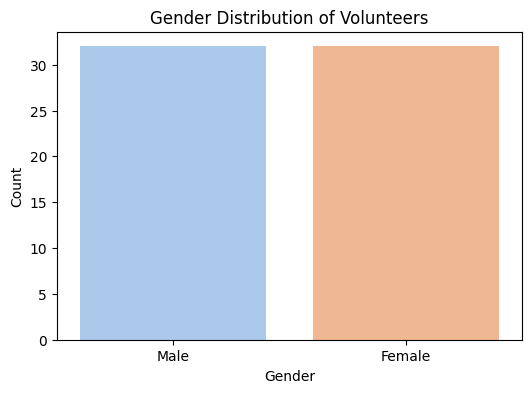

In [43]:
# Count the number of male and female volunteers
gender_counts = df['Gender'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution of Volunteers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


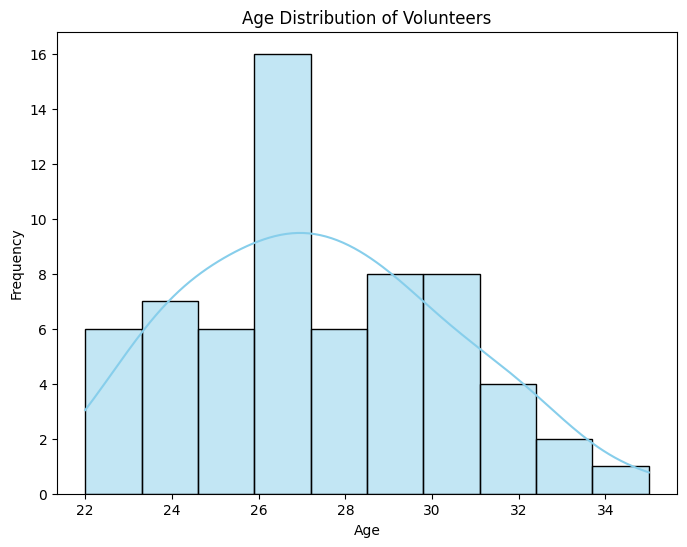

In [44]:
# Plot the age distribution of volunteers
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Volunteers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-61-b4327619aed0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=skill_counts.index, x=skill_counts.values, palette='viridis')


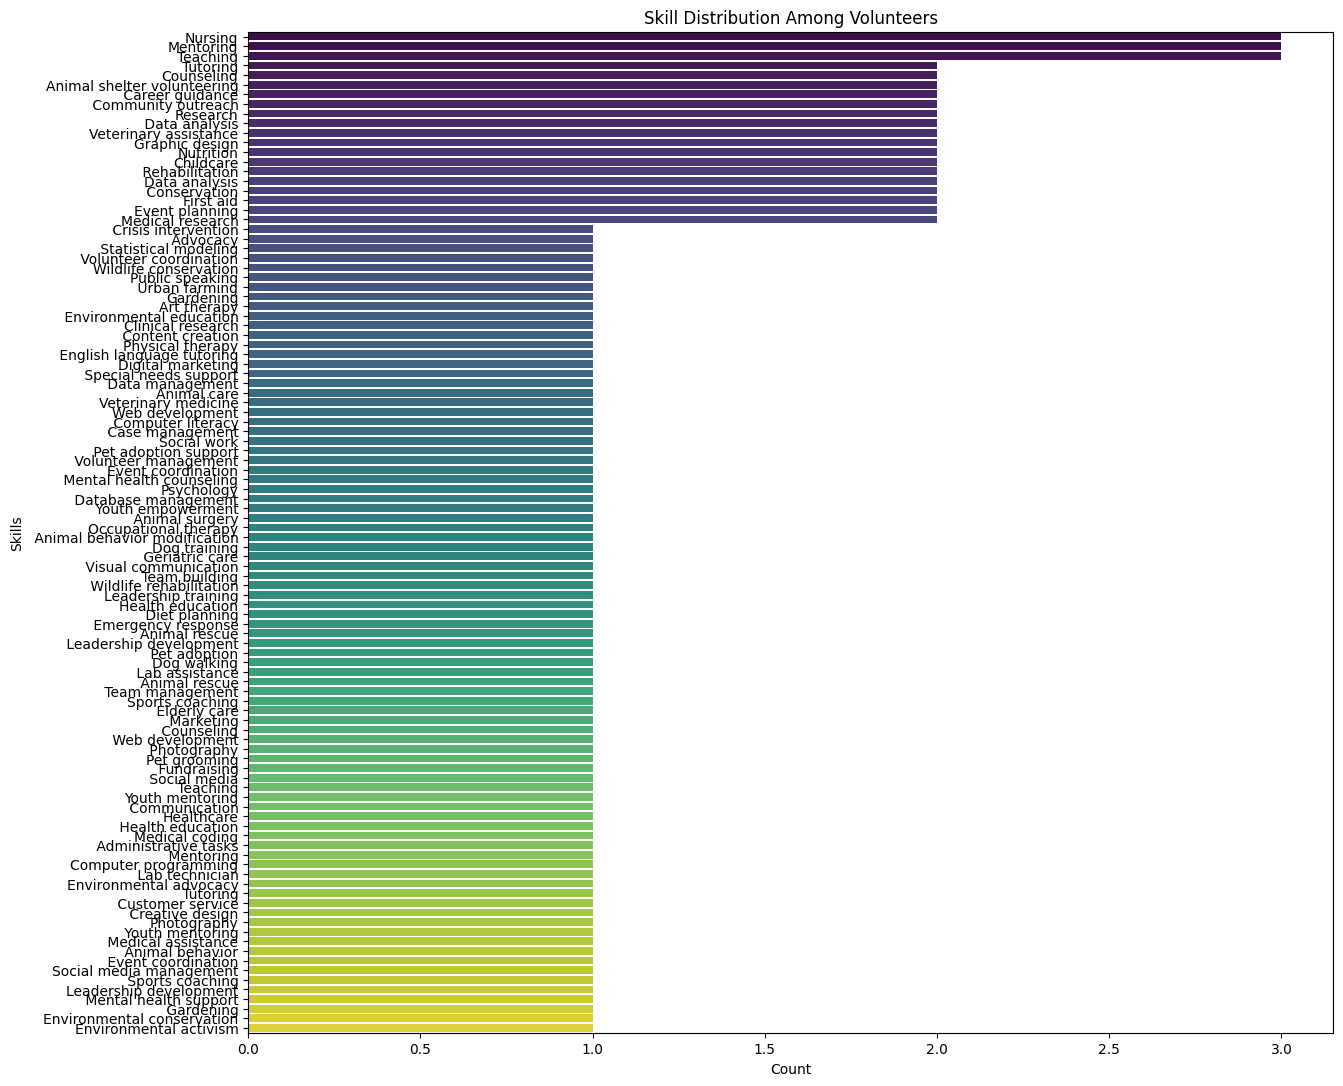

In [61]:
df['Skills'] = df['Skills'].str.split(',')
skills_df = df.explode('Skills')
skill_counts = skills_df['Skills'].value_counts()
plt.figure(figsize=(14, 13))
sns.barplot(y=skill_counts.index, x=skill_counts.values, palette='viridis')
plt.title('Skill Distribution Among Volunteers')
plt.xlabel('Count')
plt.ylabel('Skills')
plt.show()


<ipython-input-10-309f5b6d48cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=availability_counts.index, y=availability_counts.values, palette='coolwarm')


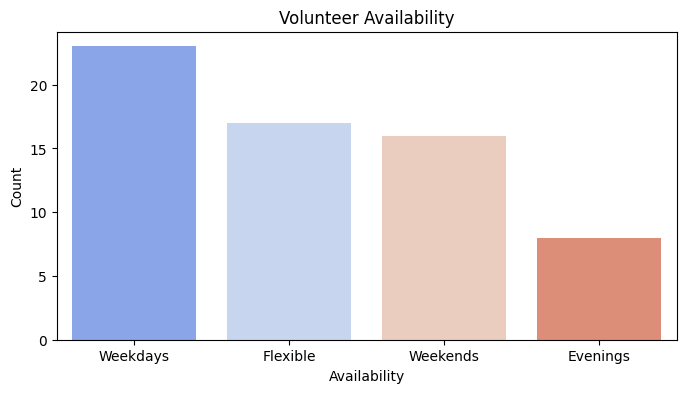

In [10]:
# Count the number of volunteers available on different days
availability_counts = df['Availability'].value_counts()

# Plot the availability distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=availability_counts.index, y=availability_counts.values, palette='coolwarm')
plt.title('Volunteer Availability')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.show()


<ipython-input-11-b3bd23f0b92b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='magma')


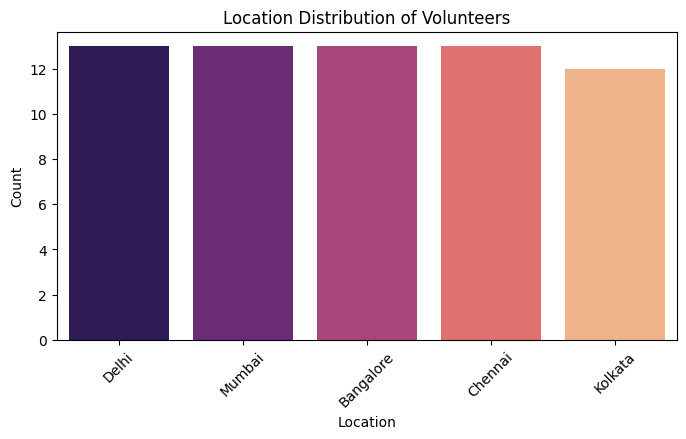

In [11]:
# Count the number of volunteers in each location
location_counts = df['Location'].value_counts()

# Plot the location distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='magma')
plt.title('Location Distribution of Volunteers')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-55aa64ab2e0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=organization_counts.index, y=organization_counts.values, palette='plasma')


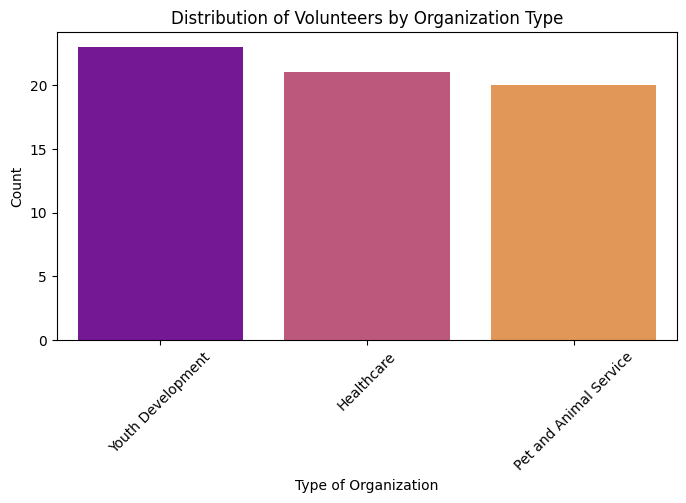

In [12]:
# Count the number of volunteers for each type of organization
organization_counts = df['Type of Organization'].value_counts()

# Plot the organization type distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=organization_counts.index, y=organization_counts.values, palette='plasma')
plt.title('Distribution of Volunteers by Organization Type')
plt.xlabel('Type of Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-8b1231990ad9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette='Set2')


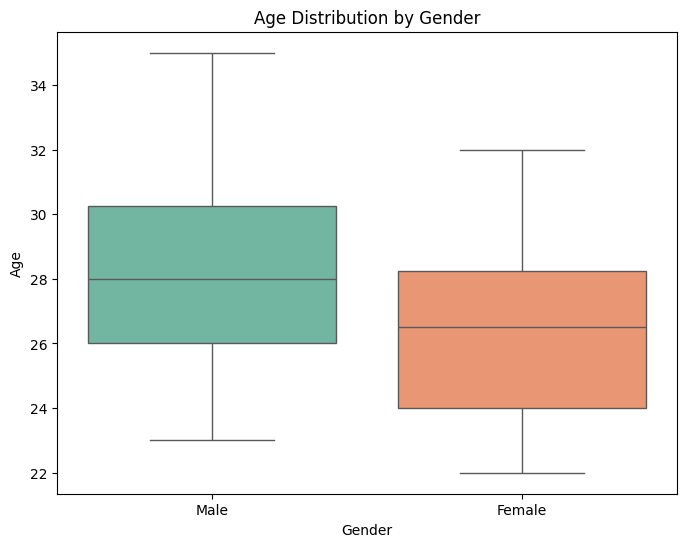

In [13]:
# Plot a boxplot to show age distribution by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


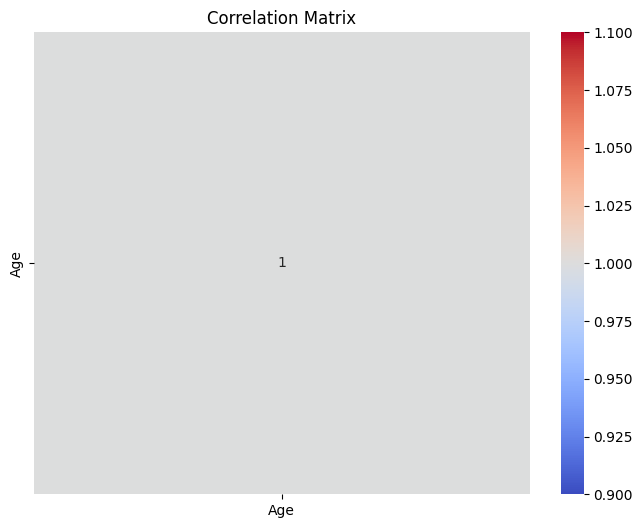

In [14]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
pip install scikit-learn


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to find the most relevant volunteers based on skill input
def find_relevant_volunteers(skill_input, df, top_n=5):
    # Combine all skills into a single string for each volunteer
    df['Combined_Skills'] = df['Skills'].fillna('').astype(str)

    # Create TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the Combined_Skills
    tfidf_matrix = vectorizer.fit_transform(df['Combined_Skills'])

    # Transform the input skill into the TF-IDF vector space
    input_skill_tfidf = vectorizer.transform([skill_input])

    # Calculate cosine similarity between the input skill and all volunteer skills
    similarity_scores = cosine_similarity(input_skill_tfidf, tfidf_matrix).flatten()

    # Get the indices of the top n highest similarity scores
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    # Return the names and skills of the top n volunteers
    top_volunteers = df.iloc[top_indices][['Volunteer Name', 'Skills']]
    return top_volunteers

# Example usage
skill_input = 'Data analysis'
top_volunteers = find_relevant_volunteers(skill_input, df, top_n=5)
print(top_volunteers)


   Volunteer Name                                 Skills
52  Mia Hernandez              [Research, Data analysis]
4   Daniel Wilson           [Data analysis, Fundraising]
63   Ethan Harris      [Medical research, Data analysis]
36   Sophia Evans  [Data analysis, Statistical modeling]
42  Lily Thompson   [Clinical research, Data management]
